In [318]:
# import libraries

import pandas as pd
import numpy as np
from pyproj import Geod
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# import training and test data

df_oct16 = pd.read_csv("https://s3-eu-west-1.amazonaws.com/fetchr-datascience/anon_dataset_10_2016.csv") 
df_nov16 = pd.read_csv("https://s3-eu-west-1.amazonaws.com/fetchr-datascience/anon_dataset_11_2016.csv") 
df_dec16 = pd.read_csv("https://s3-eu-west-1.amazonaws.com/fetchr-datascience/anon_dataset_12_2016.csv") 
df_jan17 = pd.read_csv("https://s3-eu-west-1.amazonaws.com/fetchr-datascience/anon_dataset_01_2017.csv")
df_test_feb17 = pd.read_csv("https://s3-eu-west-1.amazonaws.com/fetchr-datascience/test_dataset_02_2017.csv")

# explore data

df_oct16.shape #(106986, 14)
df_oct16.head(n=5)
df_oct16.columns

df_nov16.shape #(119444, 14)
df_nov16.head(n=5)
df_nov16.columns

df_dec16.shape #(105218, 14)
df_dec16.head(n=5)
df_dec16.columns

df_jan17.shape #(109252, 14)
df_jan17.head(n=5)
df_jan17.columns

df_test_feb17.shape #(107248, 13)
df_test_feb17.head(n=5)
df_test_feb17.columns

# add month

df_oct16['month'] = '2016-10'
df_nov16['month'] = '2016-11'
df_dec16['month'] = '2016-12'
df_jan17['month'] = '2017-01'

# append all training data

df_oct16_jan17 = pd.concat([df_oct16, df_nov16, df_dec16, df_jan17], ignore_index=True)

df_oct16_jan17.shape #(440900, 15)
df_oct16_jan17.head(n=5)
df_oct16_jan17.columns

# explore date, time, and location variables within test data

df_test_feb17.isnull().sum() #236
df_test_feb17 = df_test_feb17.dropna()

# explore date variables

df_test_feb17['commitment_date'].isnull().sum() #0
df_test_feb17['commitment_date_new'] = pd.to_datetime(df_test_feb17['commitment_date'])
min(df_test_feb17['commitment_date_new']) #2017-02-01
max(df_test_feb17['commitment_date_new']) #2017-02-28
df_test_feb17['commitment_date_new'].value_counts()

# explore time variables

df_test_feb17['delivery_time'] = df_test_feb17['delivery_time'].str.replace('t',' ')
df_test_feb17['delivery_time_new'] = pd.to_datetime(df_test_feb17['delivery_time'], errors='coerce')
min(df_test_feb17['delivery_time_new']) #2017-01-31 20:57:50
max(df_test_feb17['delivery_time_new']) #2017-03-16 11:32:56
df_test_feb17[(df_test_feb17['delivery_time_new'] > '2017-03-01')].count() #62

# explore location variables

df_test_feb17['scheduled_coordinates'].isnull().sum() #0
df_test_feb17['scheduled_coordinates'].describe() #6793 instancess with value none

df_test_feb17['schedule_lattitude'] = pd.to_numeric(df_test_feb17['scheduled_coordinates'].str.split('; ').str[0], errors = 'coerce')
df_test_feb17['schedule_longitude'] = pd.to_numeric(df_test_feb17['scheduled_coordinates'].str.split('; ').str[1], errors = 'coerce')

df_test_feb17['schedule_lattitude'].describe(.99) #range is 23.9 to 25.8
df_test_feb17['schedule_longitude'].describe(.01) #range is 52.7 to 56.3 

# explore training data

# explore id variables

df_oct16_jan17['driver_id'].isnull().sum() #0
df_oct16_jan17['driver_id'].nunique() #598

df_oct16_jan17['tracking_no'].isnull().sum() #0
df_oct16_jan17['tracking_no'].nunique() #440900

df_oct16_jan17['customer_name'].isnull().sum()
df_oct16_jan17['customer_name'].nunique() #235799

df_oct16_jan17['customer_phone'].isnull().sum() #0
df_oct16_jan17['customer_phone'].nunique() #267761

df_oct16_jan17['supplier_name'].isnull().sum() #0
df_oct16_jan17['supplier_name'].nunique() #401

# explore date variables

df_oct16_jan17['commitment_date'].isnull().sum() #0
df_oct16_jan17['commitment_date_new'] = pd.to_datetime(df_oct16_jan17['commitment_date'])
min(df_oct16_jan17['commitment_date_new']) #2016-10-01
max(df_oct16_jan17['commitment_date_new']) #2017-01-31
df_oct16_jan17['commitment_date_new'].value_counts()

# explore time variables

df_oct16_jan17['delivery_time'] = df_oct16_jan17['delivery_time'].str.replace('t',' ')
df_oct16_jan17['delivery_time_new'] = pd.to_datetime(df_oct16_jan17['delivery_time'], errors='coerce')
df_oct16_jan17['delivery_time_new'].isnull().sum() #1329
min(df_oct16_jan17['delivery_time_new']) #2012-01-01 16:05:23
max(df_oct16_jan17['delivery_time_new']) #2017-02-26 15:59:14
df_oct16_jan17[(df_oct16_jan17['delivery_time_new'] > '2017-02-01')].count() #7

# explore categorical variables

df_oct16_jan17['time_slot_from'].isnull().sum() #0
df_oct16_jan17['time_slot_from'].describe() #16 unique
df_oct16_jan17['time_slot_from'].value_counts() #9:00 most frequent

df_oct16_jan17['time_slot_to'].isnull().sum() #0
df_oct16_jan17['time_slot_to'].describe() #17 unique
df_oct16_jan17['time_slot_to'].value_counts() #14:00 most frequent

df_oct16_jan17['schedule_channel'].isnull().sum() #0
df_oct16_jan17['schedule_channel'].describe() #9 unique
df_oct16_jan17['schedule_channel'].value_counts() #csa most frequent

# explore text variables

df_oct16_jan17['customer_address'].isnull().sum() #12079 missing
df_oct16_jan17['len_address'] = df_oct16_jan17['customer_address'].str.len()
df_oct16_jan17['len_address'].describe() #61 characters on average

df_oct16_jan17['product_description'].isnull().sum() #5552 missing
df_oct16_jan17['len_prod_desc'] = df_oct16_jan17['product_description'].str.len()
df_oct16_jan17['len_prod_desc'].describe() #25 characters on average

# explore location variables

df_oct16_jan17['delivery_coordinates'].isnull().sum() #0
df_oct16_jan17['delivery_coordinates'].describe() #12135 instances with value 0;0

df_oct16_jan17['scheduled_coordinates'].isnull().sum() #0
df_oct16_jan17['scheduled_coordinates'].describe() #26955 instancess with value none

df_oct16_jan17['schedule_lattitude'] = pd.to_numeric(df_oct16_jan17['scheduled_coordinates'].str.split('; ').str[0], errors = 'coerce')
df_oct16_jan17['schedule_longitude'] = pd.to_numeric(df_oct16_jan17['scheduled_coordinates'].str.split('; ').str[1], errors = 'coerce')

df_oct16_jan17['delivery_lattitude'] = pd.to_numeric(df_oct16_jan17['delivery_coordinates'].str.split(';').str[0], errors = 'coerce')
df_oct16_jan17['delivery_longitude'] = pd.to_numeric(df_oct16_jan17['delivery_coordinates'].str.split(';').str[1], errors = 'coerce')

df_oct16_jan17['schedule_lattitude'].describe(.01) #range is 23.9 to 25.8
df_oct16_jan17['schedule_longitude'].describe(.99) #range is 52.7 to 56.3 
df_oct16_jan17['delivery_lattitude'].describe(.03) #range is 23.7 to 25.8
df_oct16_jan17['delivery_longitude'].describe(.03) #range is 52.3 to 56.3

# remove rows with missing values for location data

df_oct16_jan17_nomiss = df_oct16_jan17[(df_oct16_jan17['delivery_coordinates'] != '0;0') & (df_oct16_jan17['scheduled_coordinates'] != 'none')]

df_oct16_jan17_nomiss = df_oct16_jan17_nomiss.dropna(subset = ['schedule_lattitude'])
df_oct16_jan17_nomiss = df_oct16_jan17_nomiss.dropna(subset = ['schedule_longitude'])
df_oct16_jan17_nomiss = df_oct16_jan17_nomiss.dropna(subset = ['delivery_lattitude'])
df_oct16_jan17_nomiss = df_oct16_jan17_nomiss.dropna(subset = ['delivery_longitude'])

df_oct16_jan17.shape #440900 rows to start with
df_oct16_jan17_nomiss.shape #397743 rows left so 43157 rows deleted (9.7% of data deleted)

# Note: We still have missing values for product_description and customer_address

df_oct16_jan17_nomiss['customer_address'].isnull().sum() #11099 missing
df_oct16_jan17_nomiss['product_description'].isnull().sum() #4046 missing

# Fill NAs with 0s for length variables

df_oct16_jan17_nomiss['len_address'] = df_oct16_jan17_nomiss['len_address'].fillna(0)
df_oct16_jan17_nomiss['len_prod_desc'] = df_oct16_jan17_nomiss['len_prod_desc'].fillna(0)

# Calculate distance in meters between scheduled and delivered locations

wgs84_geod = Geod(ellps='WGS84')

def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2)
  return dist

df_oct16_jan17_nomiss['dist'] = Distance(df_oct16_jan17_nomiss['delivery_lattitude'].tolist(), df_oct16_jan17_nomiss['delivery_longitude'].tolist(), df_oct16_jan17_nomiss['schedule_lattitude'].tolist(), df_oct16_jan17_nomiss['schedule_longitude'].tolist())

# Create target variable 'accurate'

df_oct16_jan17_nomiss['accurate'] = np.where(df_oct16_jan17_nomiss['dist'] < 250, 1, 0)

df_oct16_jan17_nomiss['accurate'].value_counts() #134066 1s and 263677 0s

# Create on-time variable

df_oct16_jan17_nomiss['time_slot_from_new'] = pd.to_datetime(df_oct16_jan17_nomiss['commitment_date'] + " " + df_oct16_jan17_nomiss['time_slot_from'])
df_oct16_jan17_nomiss['time_slot_to_new'] = pd.to_datetime(df_oct16_jan17_nomiss['commitment_date'] + " " + df_oct16_jan17_nomiss['time_slot_to'])

df_oct16_jan17_nomiss['on_time'] = \
np.where((df_oct16_jan17_nomiss['time_slot_from_new'] < df_oct16_jan17_nomiss['delivery_time_new']) & \
(df_oct16_jan17_nomiss['time_slot_to_new'] > df_oct16_jan17_nomiss['delivery_time_new']), 1, 0)

# Create decile variables

df_oct16_jan17_nomiss['decile_len_address'] = pd.qcut(df_oct16_jan17_nomiss['len_address'], 10, labels=False)

df_oct16_jan17_nomiss['decile_len_prod_desc'] = pd.qcut(df_oct16_jan17_nomiss['len_prod_desc'], 10, labels=False)

# Create delivery date variable

df_oct16_jan17_nomiss['delivery_date'] = df_oct16_jan17_nomiss['delivery_time_new'].dt.date

# Create address related variables

region = ['dubai', 'sharjah', 'abu dhabi', 'ras al khaimah', 'oman', 'umm al quwain','fujairah', 'ajman']
df_oct16_jan17_nomiss['contains_region'] = df_oct16_jan17_nomiss['customer_address'].str.contains('|'.join(region))

directions = ['near', 'opposite', 'around', 'area', 'landmark']
df_oct16_jan17_nomiss['contains_directions'] = df_oct16_jan17_nomiss['customer_address'].str.contains('|'.join(directions))

specifics = ['flat', 'house', 'street', 'road', 'building']
df_oct16_jan17_nomiss['contains_specifics'] = df_oct16_jan17_nomiss['customer_address'].str.contains('|'.join(specifics))

df_oct16_jan17_nomiss['contains_region'] = df_oct16_jan17_nomiss['contains_region'].fillna(0)
df_oct16_jan17_nomiss['contains_directions'] = df_oct16_jan17_nomiss['contains_directions'].fillna(0)
df_oct16_jan17_nomiss['contains_specifics'] = df_oct16_jan17_nomiss['contains_specifics'].fillna(0)

# Create one hot variables related to categorical variables

channel = pd.get_dummies(df_oct16_jan17_nomiss['schedule_channel'], prefix='channel')
slot_to = pd.get_dummies(df_oct16_jan17_nomiss['time_slot_to'], prefix='to')
slot_from = pd.get_dummies(df_oct16_jan17_nomiss['time_slot_from'], prefix='from')
df_oct16_jan17_nomiss =  pd.concat([df_oct16_jan17_nomiss, channel, slot_to, slot_from], axis=1)

# Create day of week related to commitment date

df_oct16_jan17_nomiss['commitment_day'] = df_oct16_jan17_nomiss['commitment_date_new'].dt.weekday

# Create variable t: time since 1-Oct-2016

ref_date = datetime.date(2016, 10, 1)
df_oct16_jan17_nomiss['t'] = (df_oct16_jan17_nomiss['commitment_date_new'] - ref_date).dt.days

2016-10     98187
2016-11    104000
2016-12     94902
2017-01    100654
Name: month, dtype: int64


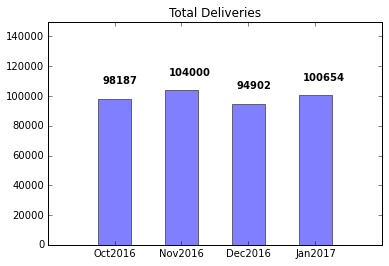

In [320]:
# Visualize total deliveries per month

fig, ax = plt.subplots()
x = df_oct16_jan17_nomiss.month.value_counts().sort_index()
print x
x.plot(kind='bar', color="blue", alpha=.5)
ax.set_xlim(-1,4)
ax.set_ylim(0,150000)
plt.title("Total Deliveries")
plt.xticks(np.arange(4), ("Oct2016", "Nov2016", "Dec2016", "Jan2017"), rotation = 0)
for i, v in enumerate(x):
    ax.text(i - 0.17, v + 10000, str(v), color='black', fontweight='bold')

         accurate   total  pct_accurate
2016-10     31028   98187      0.316009
2016-11     33980  104000      0.326731
2016-12     32543   94902      0.342912
2017-01     36515  100654      0.362777


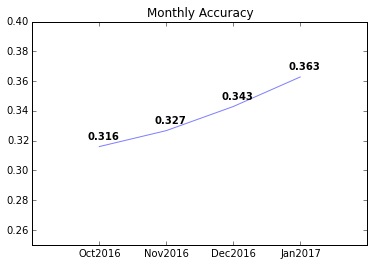

In [321]:
# Visualize accuracy per month

fig, ax = plt.subplots()
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['accurate'] == 1].month.value_counts()
x2 = df_oct16_jan17_nomiss.month.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['accurate', 'total']
x['pct_accurate'] = x['accurate']/x['total']
x.sort_index()
print x
x['pct_accurate'].plot(kind='line', color="blue", alpha=.5)
ax.set_xlim(-1,4)
ax.set_ylim(0.25,0.4)
plt.title("Monthly Accuracy")
plt.xticks(np.arange(4), ("Oct2016", "Nov2016", "Dec2016", "Jan2017"), rotation = 0)
for i, v in enumerate(x['pct_accurate']):
    ax.text(i - 0.17, v + 0.005, str("%.3f" % v), color='black', fontweight='bold')

         on_time   total  pct_on_time
2016-10    58130   98187     0.592034
2016-11    60023  104000     0.577144
2016-12    55993   94902     0.590009
2017-01    67412  100654     0.669740


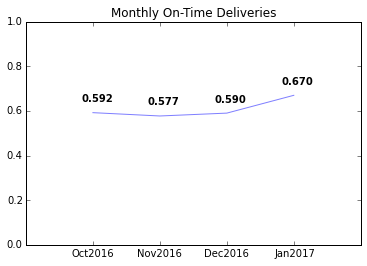

In [322]:
# Visualize % on-time delivery per month

fig, ax = plt.subplots()
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['on_time'] == 1].month.value_counts()
x2 = df_oct16_jan17_nomiss.month.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['on_time', 'total']
x['pct_on_time'] = x['on_time']/x['total']
x.sort_index()
print x
x['pct_on_time'].plot(kind='line', color="blue", alpha=.5)
ax.set_xlim(-1,4)
ax.set_ylim(0,1)
plt.title("Monthly On-Time Deliveries")
plt.xticks(np.arange(4), ("Oct2016", "Nov2016", "Dec2016", "Jan2017"), rotation = 0)
for i, v in enumerate(x['pct_on_time']):
    ax.text(i - 0.17, v + 0.05, str("%.3f" % v), color='black', fontweight='bold')

   on_time   total  pct_on_time
0   143268  263677     0.543347
1    98290  134066     0.733146


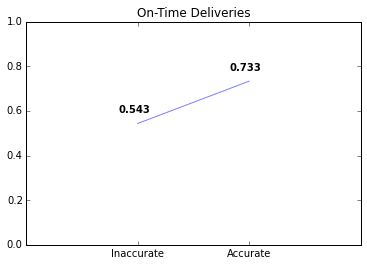

In [323]:
# Visualize % on-time deliveries with accuracy of deliveries

fig, ax = plt.subplots()
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['on_time'] == 1].accurate.value_counts()
x2 = df_oct16_jan17_nomiss.accurate.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['on_time', 'total']
x['pct_on_time'] = x['on_time']/x['total']
print x
x['pct_on_time'].plot(kind='line', color="blue", alpha=.5)
ax.set_xlim(-1,2)
ax.set_ylim(0,1)
plt.title("On-Time Deliveries")
plt.xticks(np.arange(2), ("Inaccurate", "Accurate"), rotation = 0)
for i, v in enumerate(x['pct_on_time']):
    ax.text(i - 0.17, v + 0.05, str("%.3f" % v), color='black', fontweight='bold')

                accurate   total  pct_accurate
auto schedule        759    2063      0.367911
bulkschedule        1856    5185      0.357956
csa                76480  205152      0.372797
csa-bd             21005  104513      0.200980
maf                 1032    2277      0.453228
mobile-android      2265    4095      0.553114
mobile-ios          4485    8239      0.544362
mweb               26184   66219      0.395415


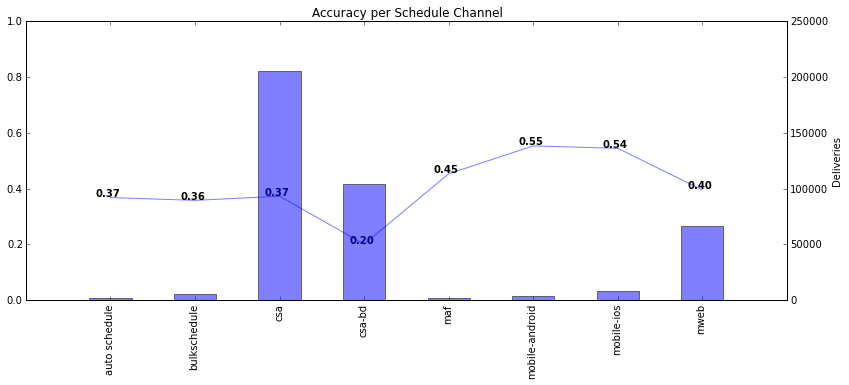

In [324]:
# Visualize accuracy per schedule channel

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['accurate'] == 1].schedule_channel.value_counts()
x2 = df_oct16_jan17_nomiss.schedule_channel.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['accurate', 'total']
x['pct_accurate'] = x['accurate']/x['total']
print x
x['pct_accurate'].plot(kind='line', color="blue", alpha=.5)
x['total'].plot(kind='bar', color="blue", alpha=.5, secondary_y = True)
n_unique = df_oct16_jan17_nomiss['schedule_channel'].nunique()
x_values = df_oct16_jan17_nomiss['schedule_channel'].unique()
x_values = np.sort(x_values)
ax.set_xlim(-1,n_unique)
ax.set_ylim(0, 1)
plt.title("Accuracy per Schedule Channel")
plt.ylabel("Deliveries")
plt.xticks(np.arange(n_unique), x_values, rotation = 0)
for i, v in enumerate(x['pct_accurate']):
    ax.text(i - 0.17, v + 0.005, str("%.2f" % v), color='black', fontweight='bold')

       accurate   total  pct_accurate
00:15      1035    2275      0.454945
02:00         4      34      0.117647
06:00       437   16565      0.026381
08:00       452   12284      0.036796
10:00       163    3537      0.046084
12:00       297    6923      0.042900
13:00        27     167      0.161677
14:00     80549  199799      0.403150
15:00        26      97      0.268041
16:00       554    1552      0.356959
17:00        15     201      0.074627
18:00     48552  140191      0.346328
19:00       127     695      0.182734
20:00       412    4704      0.087585
21:00      1213    4112      0.294990
22:00       198    4595      0.043090
23:00         5      12      0.416667


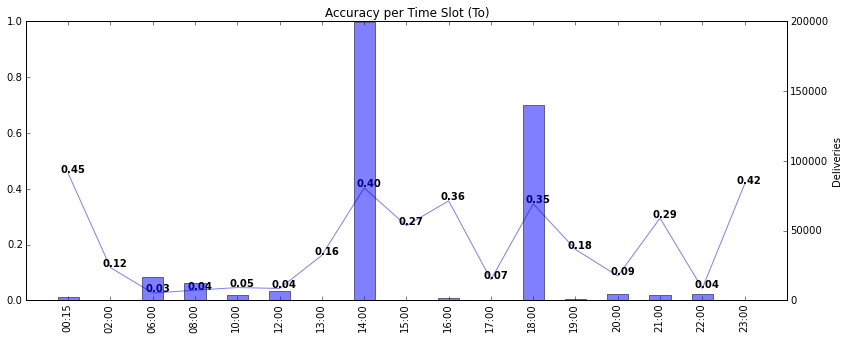

In [325]:
# Visualize accuracy per time slot

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['accurate'] == 1].time_slot_to.value_counts()
x2 = df_oct16_jan17_nomiss.time_slot_to.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['accurate', 'total']
x['pct_accurate'] = x['accurate']/x['total']
print x
x['pct_accurate'].plot(kind='line', color="blue", alpha=.5)
x['total'].plot(kind='bar', color="blue", alpha=.5, secondary_y = True)
n_unique = df_oct16_jan17_nomiss['time_slot_to'].nunique()
x_values = df_oct16_jan17_nomiss['time_slot_to'].unique()
x_values = np.sort(x_values)
ax.set_xlim(-1,n_unique)
ax.set_ylim(0, 1)
plt.title("Accuracy per Time Slot (To)")
plt.ylabel("Deliveries")
plt.xticks(np.arange(n_unique), x_values, rotation = 0)
for i, v in enumerate(x['pct_accurate']):
    ax.text(i - 0.17, v + 0.005, str("%.2f" % v), color='black', fontweight='bold')

   accurate  total  pct_accurate
0     15570  40419      0.385215
1     15030  40803      0.368355
2     14608  39485      0.369963
3     16525  43185      0.382656
4     13790  36085      0.382153
5     15884  41048      0.386962
6     14160  38360      0.369135
7     12954  40169      0.322487
8      9179  39205      0.234128
9      6366  38984      0.163298


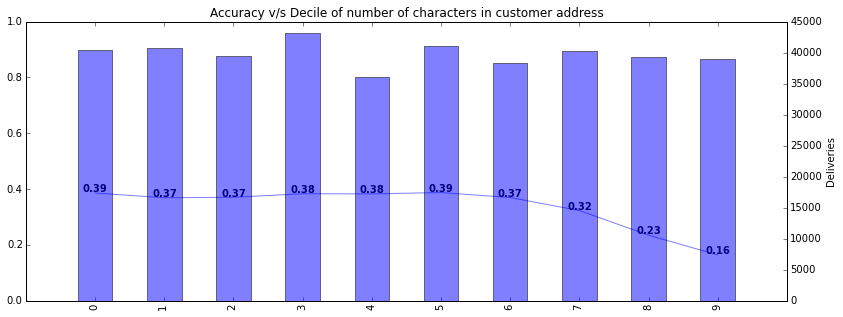

In [326]:
# Visualize accuracy with number of characters in customer address

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['accurate'] == 1].decile_len_address.value_counts()
x2 = df_oct16_jan17_nomiss.decile_len_address.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['accurate', 'total']
x['pct_accurate'] = x['accurate']/x['total']
print x
x['pct_accurate'].plot(kind='line', color="blue", alpha=.5)
x['total'].plot(kind='bar', color="blue", alpha=.5, secondary_y = True)
n_unique = df_oct16_jan17_nomiss['decile_len_address'].nunique()
x_values = df_oct16_jan17_nomiss['decile_len_address'].unique()
x_values = np.sort(x_values)
ax.set_xlim(-1,n_unique)
ax.set_ylim(0, 1)
plt.title("Accuracy v/s Decile of number of characters in customer address")
plt.ylabel("Deliveries")
plt.xticks(np.arange(n_unique), x_values, rotation = 0)
for i, v in enumerate(x['pct_accurate']):
    ax.text(i - 0.17, v + 0.005, str("%.2f" % v), color='black', fontweight='bold')

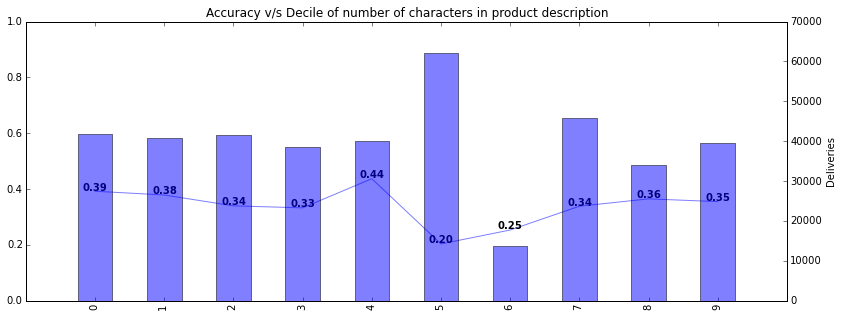

In [327]:
# Visualize accuracy with number of characters in product description

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['accurate'] == 1].decile_len_prod_desc.value_counts()
x2 = df_oct16_jan17_nomiss.decile_len_prod_desc.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['accurate', 'total']
x['pct_accurate'] = x['accurate']/x['total']
x['pct_accurate'].plot(kind='line', color="blue", alpha=.5)
x['total'].plot(kind='bar', color="blue", alpha=.5, secondary_y = True)
n_unique = df_oct16_jan17_nomiss['decile_len_prod_desc'].nunique()
x_values = df_oct16_jan17_nomiss['decile_len_prod_desc'].unique()
x_values = np.sort(x_values)
ax.set_xlim(-1,n_unique)
ax.set_ylim(0, 1)
plt.title("Accuracy v/s Decile of number of characters in product description")
plt.ylabel("Deliveries")
plt.xticks(np.arange(n_unique), x_values, rotation = 0)
for i, v in enumerate(x['pct_accurate']):
    ax.text(i - 0.17, v + 0.005, str("%.2f" % v), color='black', fontweight='bold')

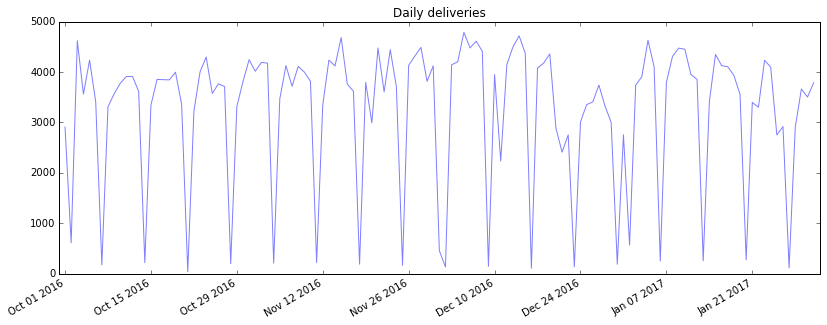

In [328]:
# Visualize total deliveries with date

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
x = df_oct16_jan17_nomiss.commitment_date_new.value_counts()
x.plot(kind='line', color="blue", alpha=.5)
ax.set_xlim('09-30-2016','02-01-2017')
plt.title("Daily deliveries");


       accurate   total  pct_accurate
False     86083  224688      0.383122
True      47983  173055      0.277270


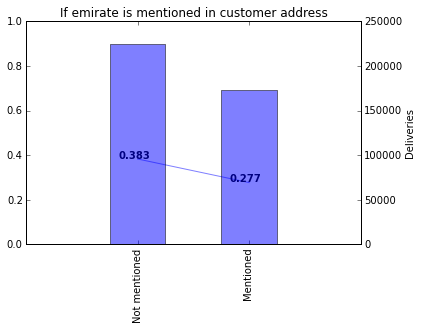

In [329]:
# Visualize accuracy with whether the customer address contains the name of the emirate

fig, ax = plt.subplots()
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['accurate'] == 1].contains_region.value_counts()
x2 = df_oct16_jan17_nomiss.contains_region.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['accurate', 'total']
x['pct_accurate'] = x['accurate']/x['total']
print x
x['pct_accurate'].plot(kind='line', color="blue", alpha=.5)
x['total'].plot(kind='bar', color="blue", alpha=.5, secondary_y = True)
ax.set_xlim(-1,2)
ax.set_ylim(0,1)
plt.title("If emirate is mentioned in customer address")
plt.ylabel("Deliveries")
plt.xticks(np.arange(2), ("Not mentioned", "Mentioned"), rotation = 0)
for i, v in enumerate(x['pct_accurate']):
    ax.text(i - 0.17, v + 0.005, str("%.3f" % v), color='black', fontweight='bold')

       accurate   total
False    103046  263438
True      31020  134305


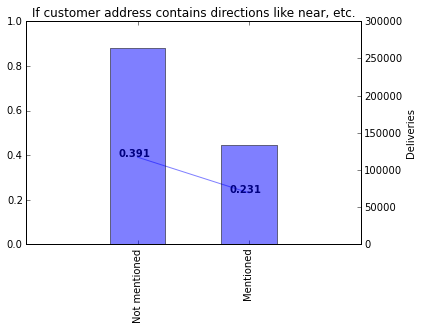

In [330]:
# Visualize accuracy with whether the customer address contains directions

fig, ax = plt.subplots()
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['accurate'] == 1].contains_directions.value_counts()
x2 = df_oct16_jan17_nomiss.contains_directions.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['accurate', 'total']
print x
x['pct_accurate'] = x['accurate']/x['total']
x['pct_accurate'].plot(kind='line', color="blue", alpha=.5)
x['total'].plot(kind='bar', color="blue", alpha=.5, secondary_y = True)
ax.set_xlim(-1,2)
ax.set_ylim(0,1)
plt.title("If customer address contains directions like near, etc.")
plt.ylabel("Deliveries")
plt.xticks(np.arange(2), ("Not mentioned", "Mentioned"), rotation = 0)
for i, v in enumerate(x['pct_accurate']):
    ax.text(i - 0.17, v + 0.005, str("%.3f" % v), color='black', fontweight='bold')

       accurate   total  pct_accurate
False     76909  202601      0.379608
True      57157  195142      0.292900


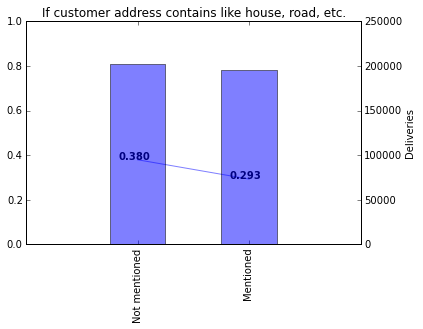

In [331]:
# Visualize accuracy with whether the customer address contains specifics like house, road, etc.

fig, ax = plt.subplots()
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['accurate'] == 1].contains_specifics.value_counts()
x2 = df_oct16_jan17_nomiss.contains_specifics.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['accurate', 'total']
x['pct_accurate'] = x['accurate']/x['total']
print x
x['pct_accurate'].plot(kind='line', color="blue", alpha=.5)
x['total'].plot(kind='bar', color="blue", alpha=.5, secondary_y = True)
ax.set_xlim(-1,2)
ax.set_ylim(0,1)
plt.title("If customer address contains like house, road, etc.")
plt.ylabel("Deliveries")
plt.xticks(np.arange(2), ("Not mentioned", "Mentioned"), rotation = 0)
for i, v in enumerate(x['pct_accurate']):
    ax.text(i - 0.17, v + 0.005, str("%.3f" % v), color='black', fontweight='bold')

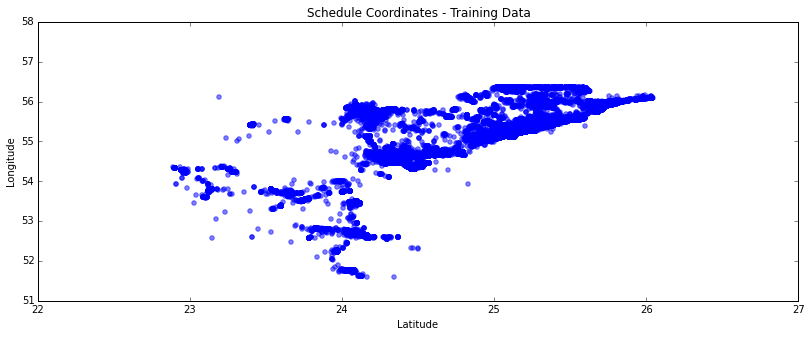

In [332]:
# Visualize deliveries based on schedule coordinates in training data

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
x = df_oct16_jan17_nomiss.schedule_lattitude
y = df_oct16_jan17_nomiss.schedule_longitude
plt.scatter(x, y, color = 'blue', alpha = .5)
plt.title("Schedule Coordinates - Training Data")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
ax.set_xlim(22,27)
ax.set_ylim(51,58);

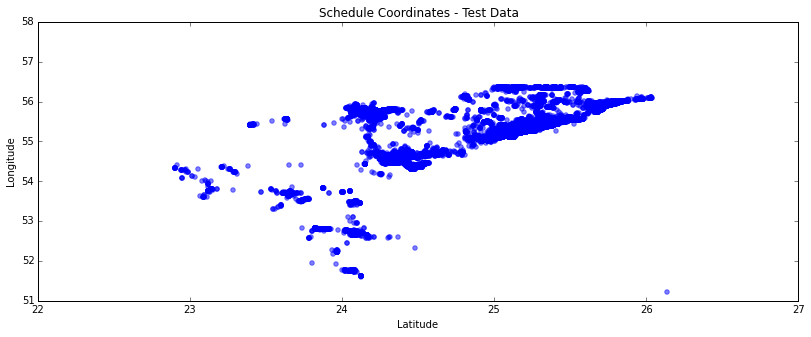

In [333]:
# Visualize deliveries based on schedule coordinates in test data

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
x = df_test_feb17.schedule_lattitude
y = df_test_feb17.schedule_longitude
plt.scatter(x, y, color = 'blue', alpha = .5)
plt.title("Schedule Coordinates - Test Data")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
ax.set_xlim(22,27)
ax.set_ylim(51,58);

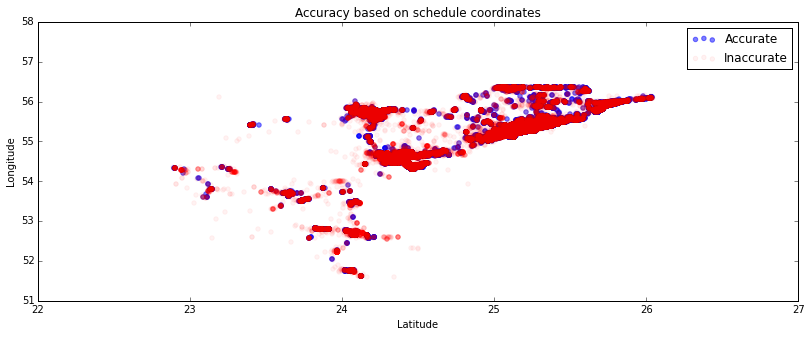

In [334]:
# Visualize accurate and inaccurate deliveries based on schedule coordinates

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
x1 = df_oct16_jan17_nomiss.schedule_lattitude[df_oct16_jan17_nomiss.accurate == 1]
y1 = df_oct16_jan17_nomiss.schedule_longitude[df_oct16_jan17_nomiss.accurate == 1]
x0 = df_oct16_jan17_nomiss.schedule_lattitude[df_oct16_jan17_nomiss.accurate == 0]
y0 = df_oct16_jan17_nomiss.schedule_longitude[df_oct16_jan17_nomiss.accurate == 0]
plt.scatter(x1, y1, color = 'blue', alpha = .5)
plt.scatter(x0, y0, color = 'red', alpha = .05)
plt.title("Accuracy based on schedule coordinates")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.legend(('Accurate', 'Inaccurate'),loc='best') 
ax.set_xlim(22,27)
ax.set_ylim(51,58);

   accurate  total  pct_accurate
0     25456  74335      0.342450
1     24286  71043      0.341849
2     22261  66723      0.333633
3     20611  58797      0.350545
4       314   2966      0.105866
5     20247  62239      0.325310
6     20891  61640      0.338920


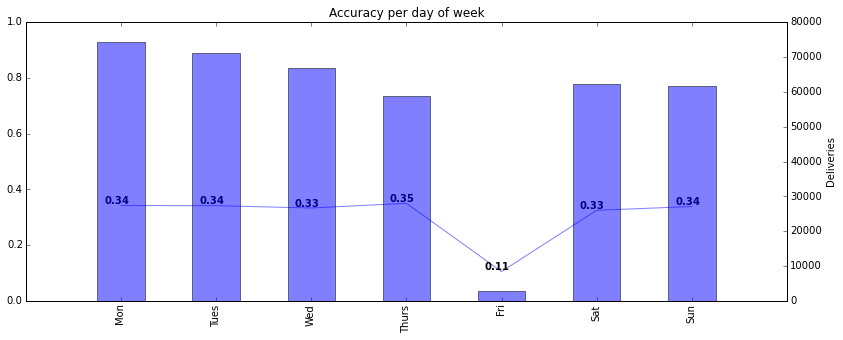

In [335]:
# Visualize accuracy with day of week

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
x1 = df_oct16_jan17_nomiss[df_oct16_jan17_nomiss['accurate'] == 1].commitment_day.value_counts()
x2 = df_oct16_jan17_nomiss.commitment_day.value_counts()
x = pd.concat([x1, x2], axis = 1)
x.columns = ['accurate', 'total']
x['pct_accurate'] = x['accurate']/x['total']
print x
x['pct_accurate'].plot(kind='line', color="blue", alpha=.5)
x['total'].plot(kind='bar', color="blue", alpha=.5, secondary_y = True)
n_unique = df_oct16_jan17_nomiss['commitment_day'].nunique()
x_values = df_oct16_jan17_nomiss['commitment_day'].unique()
x_values = np.sort(x_values)
ax.set_xlim(-1,n_unique)
ax.set_ylim(0, 1)
plt.title("Accuracy per day of week")
plt.ylabel("Deliveries")
plt.xticks(np.arange(n_unique), ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"], rotation = 0)
for i, v in enumerate(x['pct_accurate']):
    ax.text(i - 0.17, v + 0.005, str("%.2f" % v), color='black', fontweight='bold')

/Users/pallaviahuja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


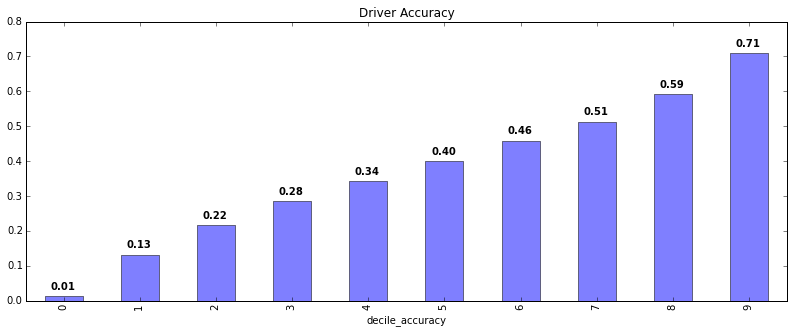

In [336]:
# Visualize driver accuracy

driver_acc = df_oct16_jan17_nomiss.groupby('driver_id')['accurate'].mean()
driver_tot = df_oct16_jan17_nomiss.groupby('driver_id')['tracking_no'].count()
driver_level = pd.concat([driver_tot, driver_acc], axis = 1)
driver_level.columns = ['total', 'accuracy']
driver_level = driver_level.sort_values(by = 'accuracy')
driver_level_gt4 = driver_level[driver_level['total'] > 4] # at least one delivery per month
driver_level_gt4['decile_accuracy'] = pd.qcut(driver_level_gt4['accuracy'], 10, labels=False)
driver_level_gt4_v2= driver_level_gt4.groupby('decile_accuracy')['accuracy'].mean()
driver_level_gt4_v2

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
driver_level_gt4_v2.plot(kind='bar', color="blue", alpha=.5)
plt.title("Driver Accuracy");
for i, v in enumerate(driver_level_gt4_v2):
    ax.text(i - 0.17, v + 0.02, str("%.2f" % v), color='black', fontweight='bold')

/Users/pallaviahuja/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


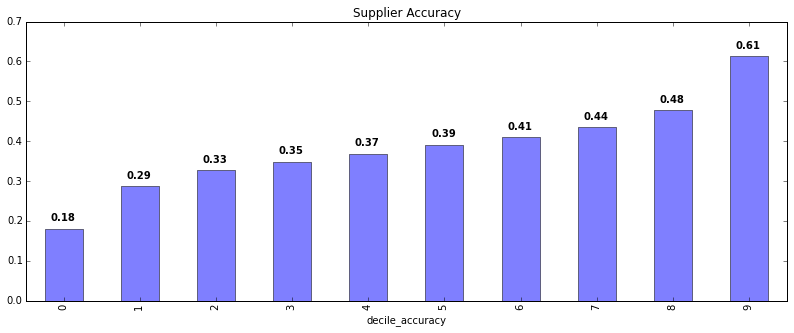

In [337]:
# Visualize supplier accuracy

supplier_acc = df_oct16_jan17_nomiss.groupby('supplier_name')['accurate'].mean()
supplier_tot = df_oct16_jan17_nomiss.groupby('supplier_name')['tracking_no'].count()
supplier_level = pd.concat([supplier_tot, supplier_acc], axis = 1)
supplier_level.columns = ['total', 'accuracy']
supplier_level = supplier_level.sort_values(by = 'accuracy')
supplier_level_gt4 = supplier_level[supplier_level['total'] > 4] # at least one delivery per month
supplier_level_gt4['decile_accuracy'] = pd.qcut(supplier_level_gt4['accuracy'], 10, labels=False)
supplier_level_gt4_v2= supplier_level_gt4.groupby('decile_accuracy')['accuracy'].mean()
supplier_level_gt4_v2

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(121)
supplier_level_gt4_v2.plot(kind='bar', color="blue", alpha=.5)
plt.title("Supplier Accuracy");
for i, v in enumerate(supplier_level_gt4_v2):
    ax.text(i - 0.17, v + 0.02, str("%.2f" % v), color='black', fontweight='bold')

In [338]:
# Build and validate model

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Iteration 1: Using all variables

# df_columns = df_oct16_jan17_nomiss.columns
# col1 = df_columns[df_columns.str.startswith(('channel', 'to', 'from', 'contains', 'len'))==1]
# col2 = ['t', 'driver_id', 'supplier_name', 'schedule_lattitude', 'schedule_longitude', 'commitment_day']
# features = col1 | col2

# Iteration 2: Using all visualized variables

# features = ['t', 'driver_id', 'supplier_name','len_address', 'len_prod_desc','channel_csa-bd', 'schedule_lattitude', 'schedule_longitude', 'commitment_day', 'contains_region', 'contains_directions', 'contains_specifics']

# Iteration 3: Using top 5 variables by feature importance

features = ['schedule_lattitude', 'schedule_longitude', 't', 'driver_id', 'supplier_name']

df_oct16_jan17_nomiss_x = df_oct16_jan17_nomiss[features]
df_oct16_jan17_nomiss_y = df_oct16_jan17_nomiss['accurate']

x_train, x_validation, y_train, y_validation = train_test_split(df_oct16_jan17_nomiss_x, df_oct16_jan17_nomiss_y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators = 100, max_features = 3, max_depth = 30, min_samples_leaf = 4)
clf.fit(x_train, y_train)
predictions = clf.predict(x_validation)
for i in xrange(0, 5):
    print "Actual outcome: {} and Predicted outcome: {}".format(list(y_validation)[i], predictions[i])

    print "Train Accuracy:", accuracy_score(y_train, clf.predict(x_train))
    print "Validation Accuracy:", accuracy_score(y_validation, predictions)

Actual outcome: 0 and Predicted outcome: 0
Train Accuracy: 0.91580293783
Validation Accuracy: 0.759267872632
Actual outcome: 0 and Predicted outcome: 0
Train Accuracy: 0.91580293783
Validation Accuracy: 0.759267872632
Actual outcome: 0 and Predicted outcome: 1
Train Accuracy: 0.91580293783
Validation Accuracy: 0.759267872632
Actual outcome: 0 and Predicted outcome: 0
Train Accuracy: 0.91580293783
Validation Accuracy: 0.759267872632
Actual outcome: 0 and Predicted outcome: 0
Train Accuracy: 0.91580293783
Validation Accuracy: 0.759267872632


In [339]:
pd.crosstab(y_validation, predictions, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,45413,7383
1,11767,14986


In [340]:
list(zip(df_oct16_jan17_nomiss_x, clf.feature_importances_))

[('schedule_lattitude', 0.2706664758124005),
 ('schedule_longitude', 0.25631007493650265),
 ('t', 0.16594960329777581),
 ('driver_id', 0.12176810075727169),
 ('supplier_name', 0.1853057451960495)]

In [350]:
# score test data - df_test_feb17

df_test_feb17 = df_test_feb17.fillna(0)
df_test_feb17['driver_id'] = np.where(df_test_feb17['driver_id'] == 'none', '0', df_test_feb17['driver_id'])
ref_date = datetime.date(2016, 10, 1)
df_test_feb17['t'] = (df_test_feb17['commitment_date_new'] - ref_date).dt.days

df_test_feb17_x = df_test_feb17[features]
predictions_test_feb17 = clf.predict(df_test_feb17_x)
predictions_test_feb17[0:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1])